In [800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from warnings import filterwarnings
import pprint
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [801]:
filterwarnings(action='ignore')

## Loading datasets and getting some info

In [802]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [803]:
submission = pd.read_csv('dataset/test.csv')

In [804]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [805]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [806]:
# seperating categorical features from non-categoricals

categoricals = train_df.dtypes[train_df.dtypes == 'object'].index
non_categoricals = train_df.dtypes[train_df.dtypes != 'object'].index

print('Categoricals: ', categoricals)
print('\n Non-Categoricals: ', non_categoricals)

Categoricals:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

 Non-Categoricals:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',

## Finding and handling missing values

In [807]:
nums = train_df.isna().sum().sort_values(ascending=False)
percent = train_df.isna().sum()/train_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


According to data description, NaNs in some features doesn't mean that the data is missing, it means None: Fence -> Nan means no_fence

In [808]:
trap_missings = ['Fence', 'PoolQC', 'Alley', 'FireplaceQu',
                 'GarageFinish', 'GarageType', 'GarageQual',
                 'GarageCond', 'MiscFeature', 'BsmtFinType2',
                 'BsmtFinType1', 'BsmtExposure', 'BsmtCond',
                 'BsmtQual', 'MasVnrType']

for col in trap_missings:
    train_df[col].fillna('None', inplace=True)

In [809]:
# Numerical

train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(), inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)

In [810]:
# Categorical

train_df.groupby('Electrical')['Electrical'].count().sort_values(ascending=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [811]:
train_df['Electrical'].fillna('SBrkr', inplace=True)

In [812]:
nums = train_df.isna().sum().sort_values(ascending=False)
percent = train_df.isna().sum()/train_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

,Total,Percent


All clean!

## Outliers

In [813]:
non_categoricals = non_categoricals.drop(['Id', 'SalePrice'])

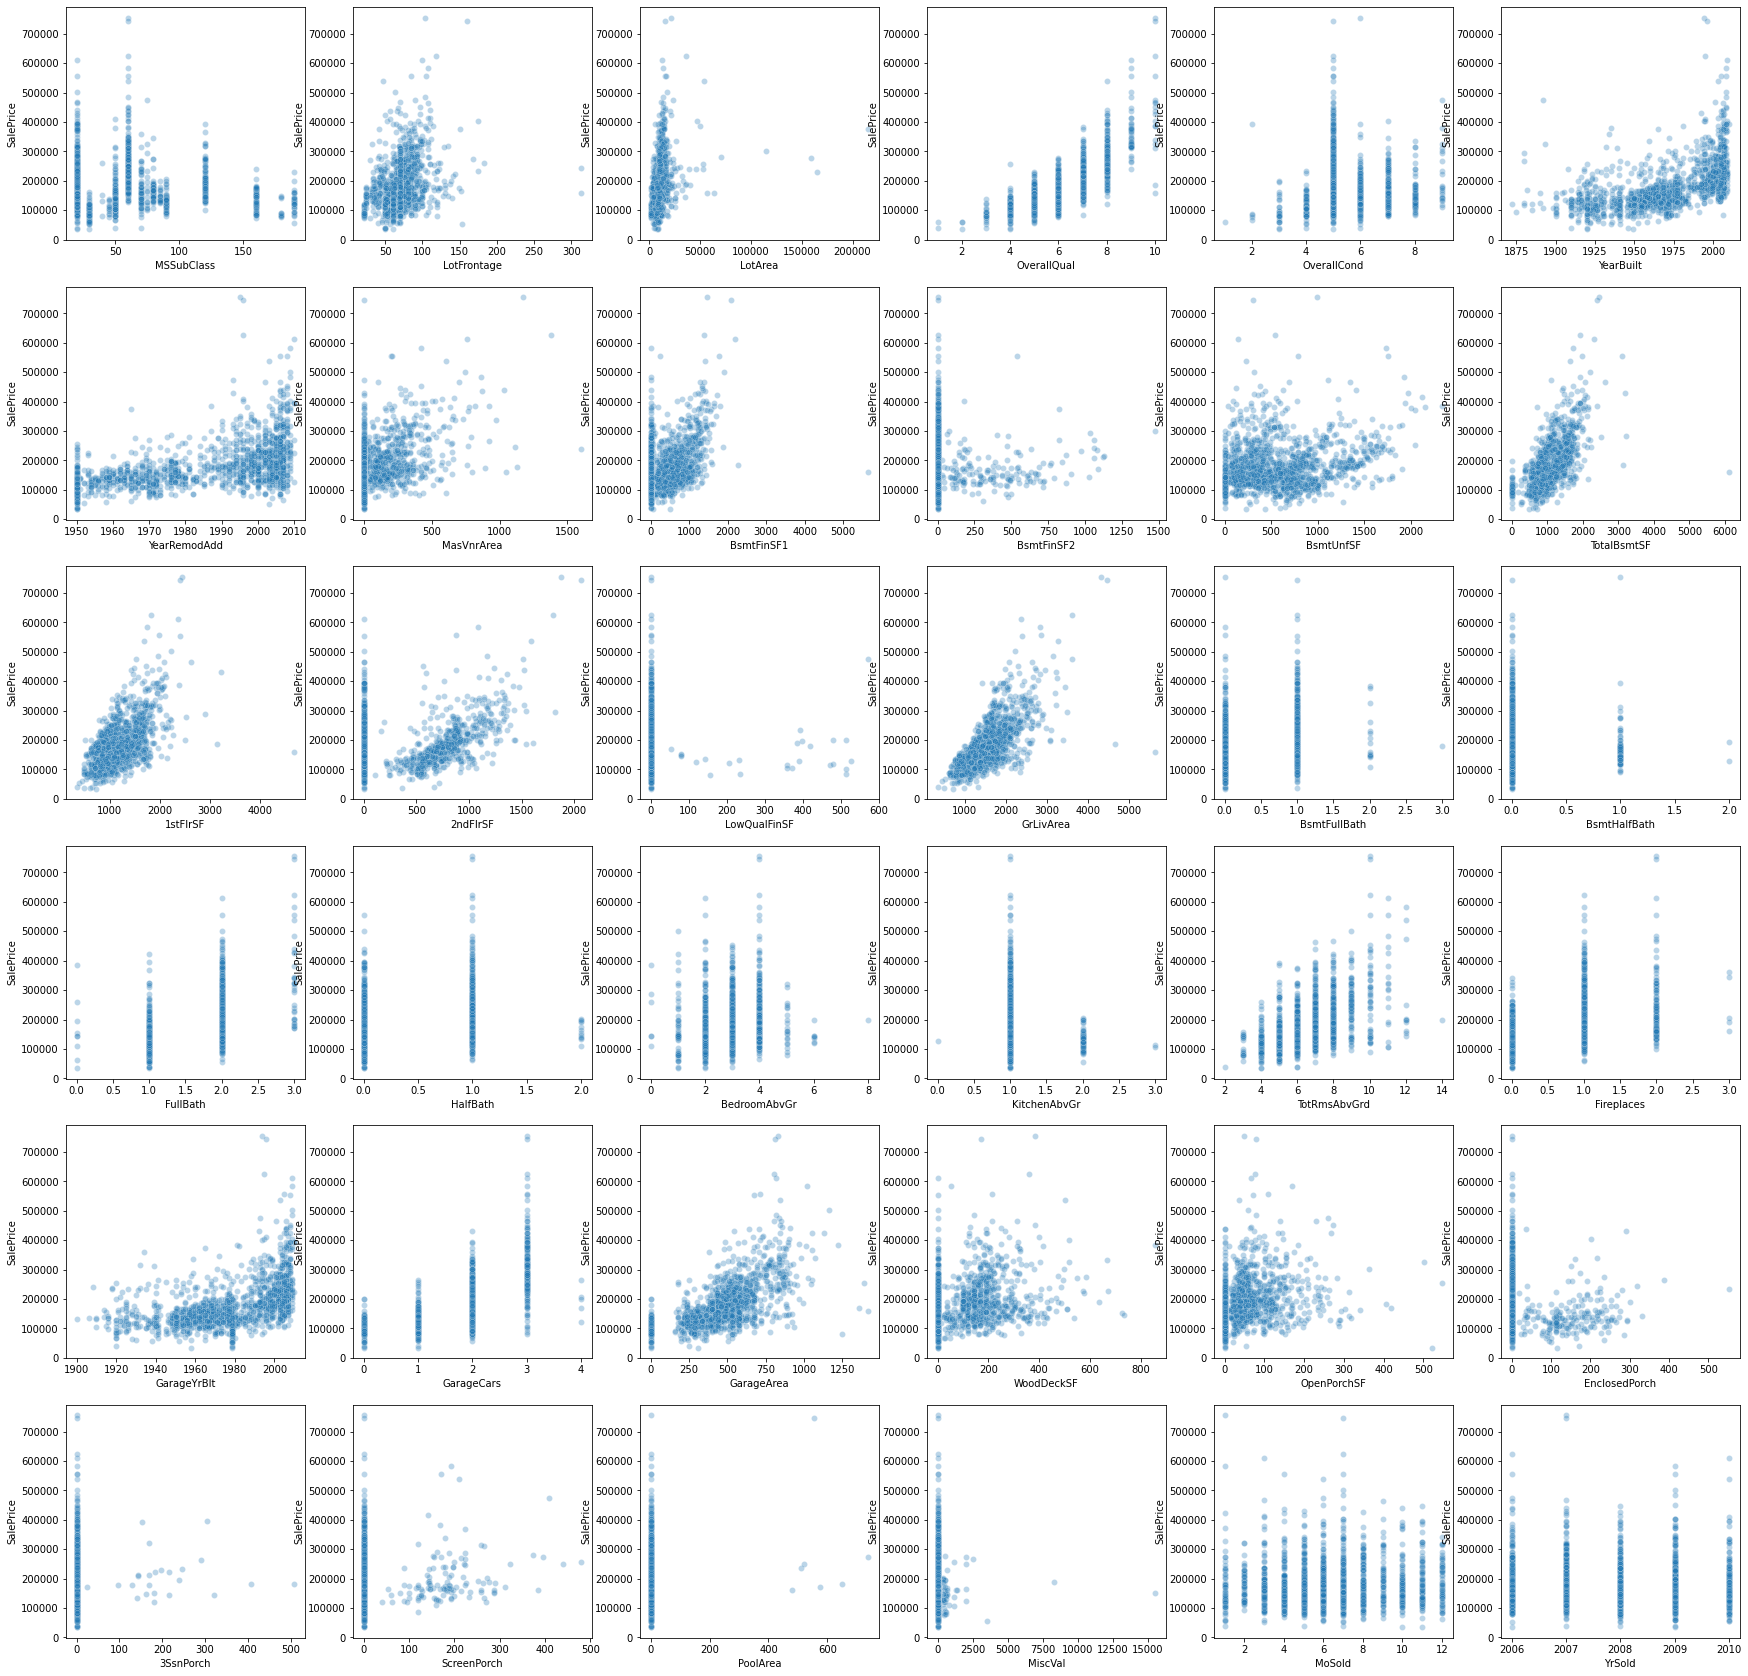

In [814]:
fig, axes = plt.subplots(6, 6, figsize=(30, 30))

for col, ax in zip(non_categoricals, axes.flatten()):
    sns.scatterplot(train_df[col], y=train_df['SalePrice'], ax=ax, alpha=0.3)

In [815]:
train_df = train_df.drop(train_df[train_df['GrLivArea']>5000].index)
train_df = train_df.drop(train_df[train_df['LotArea']>200000].index)
train_df = train_df.drop(train_df[train_df['TotalBsmtSF']>4000].index)
train_df = train_df.drop(train_df[train_df['LotFrontage']>200].index)
train_df = train_df.drop(train_df[train_df['1stFlrSF']>4000].index)

## Feature importance

<AxesSubplot:>

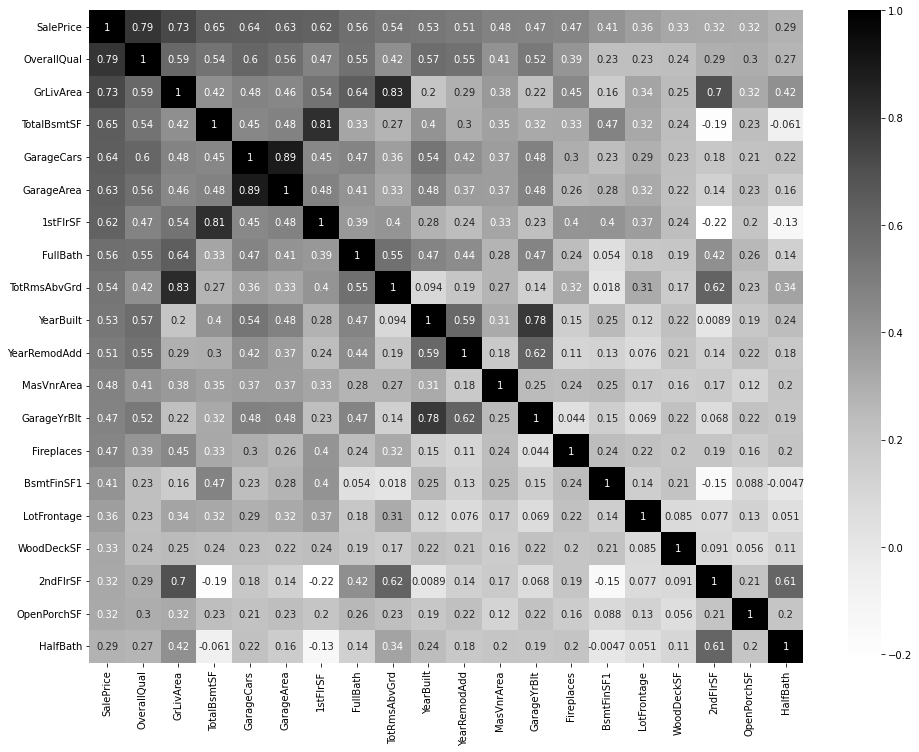

In [816]:
# getting the features which are highly correlated to SalePrice

cols = train_df.corr().nlargest(20, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(16, 12))
sns.heatmap(train_df[cols].corr(), cmap='Greys', annot=True)

### Creating new features

In [817]:
none = ['None', 'NA']
for row in [train_df]:
    row['HasPool'] = 1
    row.loc[(row['PoolQC'].isin(none)), 'HasPool'] = 0

    row['HasWoodDeck'] = 1
    row.loc[(row['WoodDeckSF'].isin(none)), 'HasWoodDeck'] = 0

    row['HasOpenPorch'] = 1
    row.loc[(row['OpenPorchSF'].isin(none)), 'HasOpenPorch'] = 0

    row['HasScreenPorch'] = 1
    row.loc[(row['ScreenPorch'].isin(none)), 'HasScreenPorch'] = 0

    row['HasAlleyAccess'] = 1
    row.loc[(row['Alley'].isin(none)), 'HasAlleyAccess'] = 0

    row['HasFirePlace'] = 1
    row.loc[(row['Fireplaces'] == 0), 'HasFirePlace'] = 0

    row['HasGarage'] = 1
    row.loc[(row['GarageType'].isin(none)), 'HasGarage'] = 0
    
    row['HasMVArea'] = 1
    row.loc[(row['MasVnrArea'] == 0), 'HasMVArea'] = 0
    

    row['Remodeled'] = 1
    row.loc[(row['YearBuilt'] == row['YearRemodAdd']), 'Remodeled'] = 0

    row['TotalHouseSF'] = row['1stFlrSF'] + \
        row['TotalBsmtSF'] + row['2ndFlrSF']

    row['HasBasement'] = 1
    row.loc[(row['BsmtFinType1'].isin(none) & (
        row['BsmtFinType2'].isin(none))), 'HasBasement'] = 0

    row['TotalBathroom'] = row['FullBath'] + \
        (row['HalfBath']*0.5) + row['BsmtFullBath'] + \
        (row['BsmtHalfBath']*0.5)

    row['TotalHouseQuality'] = row['OverallQual'] + row['OverallCond']
    

Checking if there is any change in the correlation after creating new features

<AxesSubplot:>

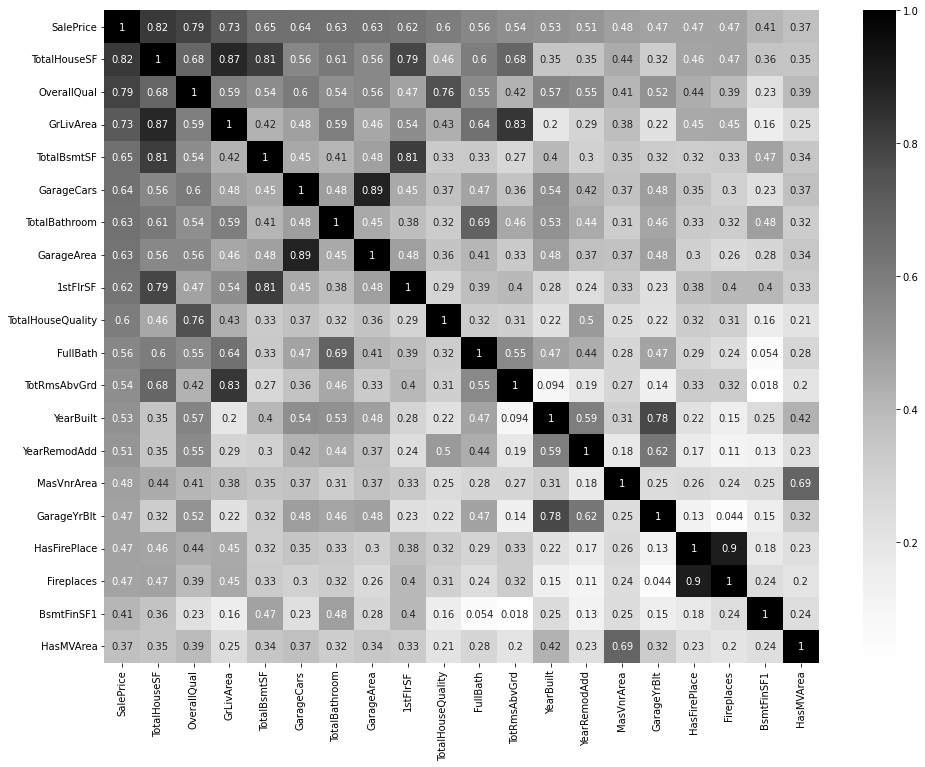

In [818]:
cols = train_df.corr().nlargest(20, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(16, 12))
sns.heatmap(train_df[cols].corr(), cmap='Greys', annot=True)

In [819]:
train_df = train_df[cols]
train_df.drop(['GarageArea', '1stFlrSF', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

We dropped column which had the same effect on producing HousePrice and were highly correlated to eachother: Garagecars and GarageArea. And also I dropped MasVnrArea because it contains lots of zero values and does not follow normal distribution. Normalizing columns with zero values by log transformation are a problem since log(0) is undefined. We created HasMVArea so that hopefully we don't lose much information.

## Normalization

<AxesSubplot:title={'center':'After Normalization'}, xlabel='SalePrice', ylabel='Density'>

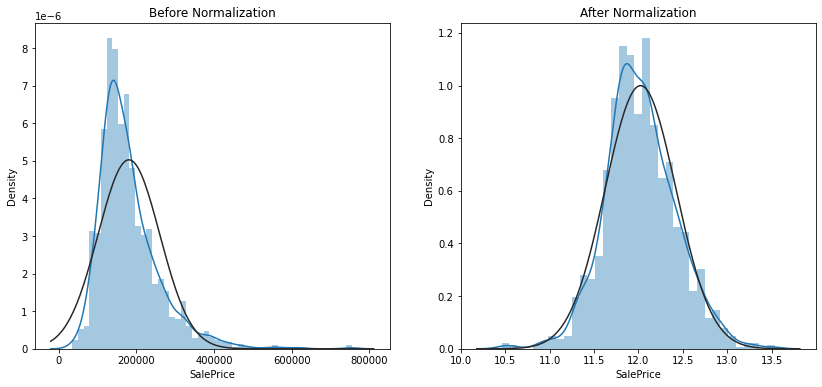

In [820]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['SalePrice'] = np.log(train_df['SalePrice'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax[1])

<AxesSubplot:title={'center':'After Normalization'}, xlabel='GrLivArea', ylabel='Density'>

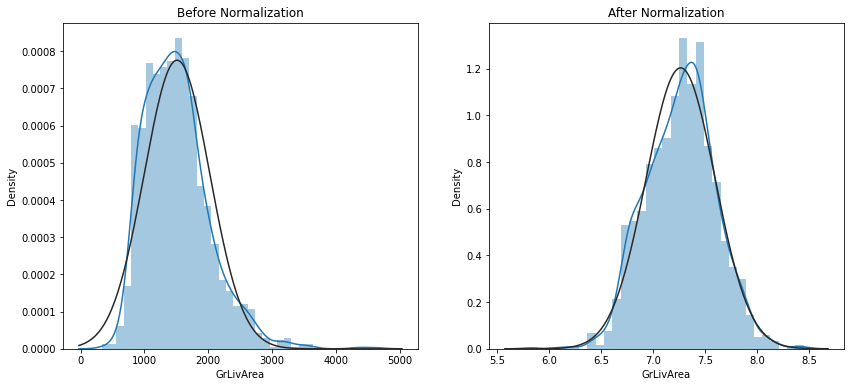

In [821]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['GrLivArea'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['GrLivArea'], fit=stats.norm, ax=ax[1])

<AxesSubplot:title={'center':'After Normalization'}, xlabel='TotalHouseSF', ylabel='Density'>

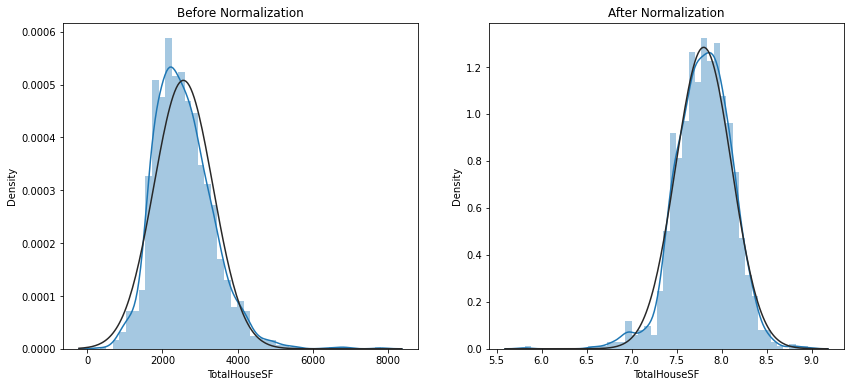

In [822]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.distplot(train_df['TotalHouseSF'], fit=stats.norm, ax=ax[0])
ax[0].set_title('Before Normalization')

train_df['TotalHouseSF'] = np.log(train_df['TotalHouseSF'])
ax[1].set_title('After Normalization')
sns.distplot(train_df['TotalHouseSF'], fit=stats.norm, ax=ax[1])

## Modeling

In [823]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [824]:
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

In [825]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42, test_size=0.2)

In [826]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42, objective='regression')

In [827]:
ensemble_regressor = VotingRegressor(
    [('lr', lr), ('rf', rf), ('lgb', lgb)])

In [828]:
for reg in (lr, rf, lgb, ensemble_regressor):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_val)
    print(reg.__class__.__name__, mean_squared_error(y_val, y_pred))

LinearRegression 0.020603628568070954
RandomForestRegressor 0.02308201715957227
LGBMRegressor 0.02259214753837429
VotingRegressor 0.019619906359557356



## Predicting the test set

In [829]:
trap_missings = ['PoolQC', 'FireplaceQu', 'Alley']

In [ ]:
test_df.drop(['SaleType', 'Exterior1st', 'KitchenQual', 'Utilities', 'MSZoning',
             'BsmtQual', 'BsmtCond', 'LotFrontage', 'MiscFeature',
              'Fence', 'Electrical', 'Exterior2nd', 'Functional', 'GarageFinish',
              'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageCond', 'BsmtExposure',
              'MasVnrType', 'GarageQual'], axis=1, inplace=True)

### Missing values

In [ ]:
nums = test_df.isna().sum().sort_values(ascending=False)
percent = test_df.isna().sum()/test_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

In [ ]:
# replacing None for those were included in the data description
for col in trap_missings:
    test_df[col].fillna('None', inplace=True)

# imputing values for numerical features
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean(), inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(), inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(), inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(), inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0], inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0], inplace=True)
test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0], inplace=True)
test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0], inplace=True)
test_df['GarageType'].fillna(test_df['GarageType'].mode()[0], inplace=True)

In [ ]:
nums = test_df.isna().sum().sort_values(ascending=False)
percent = test_df.isna().sum()/test_df.isna().count().sort_values(ascending=False)
missings = pd.concat([nums, percent], axis=1, keys=['Total', 'Percent'])

missings[missings['Total'] != 0]

All clean!

In [ ]:
none = ['None', 'NA']
for row in [test_df]:
    row['HasPool'] = 1
    row.loc[(row['PoolQC'].isin(none)), 'HasPool'] = 0

    row['HasWoodDeck'] = 1
    row.loc[(row['WoodDeckSF'].isin(none)), 'HasWoodDeck'] = 0

    row['HasOpenPorch'] = 1
    row.loc[(row['OpenPorchSF'].isin(none)), 'HasOpenPorch'] = 0

    row['HasScreenPorch'] = 1
    row.loc[(row['ScreenPorch'].isin(none)), 'HasScreenPorch'] = 0

    row['HasAlleyAccess'] = 1
    row.loc[(row['Alley'].isin(none)), 'HasAlleyAccess'] = 0

    row['HasFirePlace'] = 1
    row.loc[(row['Fireplaces'] == 0), 'HasFirePlace'] = 0

    row['HasGarage'] = 1
    row.loc[(row['GarageType'].isin(none)), 'HasGarage'] = 0
    
    row['HasMVArea'] = 1
    row.loc[(row['MasVnrArea'] == 0), 'HasMVArea'] = 0
    

    row['Remodeled'] = 1
    row.loc[(row['YearBuilt'] == row['YearRemodAdd']), 'Remodeled'] = 0

    row['TotalHouseSF'] = row['1stFlrSF'] + \
        row['TotalBsmtSF'] + row['2ndFlrSF']

    row['HasBasement'] = 1
    row.loc[(row['BsmtFinType1'].isin(none) & (
        row['BsmtFinType2'].isin(none))), 'HasBasement'] = 0

    row['TotalBathroom'] = row['FullBath'] + \
        (row['HalfBath']*0.5) + row['BsmtFullBath'] + \
        (row['BsmtHalfBath']*0.5)

    row['TotalHouseQuality'] = row['OverallQual'] + row['OverallCond']

In [ ]:
features = X_train.columns.to_list()
test_df = test_df[features]

## Normalization

In [ ]:
test_df['GrLivArea'] = np.log(test_df['GrLivArea'])
test_df['TotalHouseSF'] = np.log(test_df['TotalHouseSF'])

In [ ]:
y_pred = np.expm1(ensemble_regressor.predict(test_df))

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])

In [ ]:
y_pred